# Model

## Libraries

In [17]:
from keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.models import Model
from keras.layers import Dense, Flatten, Input, GlobalAveragePooling2D, Dropout
import numpy as np
import os
import csv
import cv2
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras import callbacks
from keras.optimizers import Adam

In [18]:
data_location = './traffic_light_images/'

## Load Training Logs

In [19]:
samples = []
with open(data_location + 'labels.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

# to remove header in Udacity dataset
# can leave it in for recorded data as missing one frame is negligible
#samples.pop(0)

## Split Training and Validation Samples

In [20]:
train_samples, validation_samples = train_test_split(samples, test_size = 0.2)

## Image Preprocessing

In [21]:
def image_preprocessing(image):
    return cv2.resize(image, (128, 128), interpolation = cv2.INTER_LINEAR)

## Data Visualization

training example m : 2764


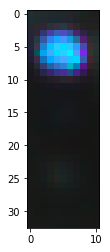

Red


In [22]:
m = np.random.randint(0,len(samples))
print('training example m :', m)

sample = samples[m]
image = cv2.imread(data_location + sample[0])

plt.figure

plt.imshow(image)

plt.show()

print(sample[1])

In [23]:
for i, sample in enumerate(samples):
    image = cv2.imread(data_location + sample[0])
    if type(image) != type(None):
        print(data_location + sample[0])
        print(image.shape)
        image_preprocessing(image)

./traffic_light_images/5_0_207464.png
(12, 7, 3)
./traffic_light_images/5_2_207464.png
(12, 8, 3)
./traffic_light_images/6_1_207468.png
(10, 7, 3)
./traffic_light_images/7_0_207484.png
(9, 6, 3)
./traffic_light_images/7_1_207484.png
(9, 6, 3)
./traffic_light_images/7_2_207484.png
(12, 6, 3)
./traffic_light_images/8_0_207512.png
(11, 7, 3)
./traffic_light_images/8_1_207512.png
(13, 8, 3)
./traffic_light_images/9_0_207542.png
(10, 6, 3)
./traffic_light_images/9_1_207542.png
(11, 8, 3)
./traffic_light_images/13_1_207840.png
(13, 6, 3)
./traffic_light_images/13_3_207840.png
(15, 8, 3)
./traffic_light_images/13_4_207840.png
(14, 7, 3)
./traffic_light_images/14_0_207858.png
(16, 8, 3)
./traffic_light_images/14_1_207858.png
(13, 6, 3)
./traffic_light_images/14_2_207858.png
(16, 6, 3)
./traffic_light_images/14_3_207858.png
(16, 7, 3)
./traffic_light_images/14_4_207858.png
(17, 8, 3)
./traffic_light_images/15_0_207864.png
(17, 7, 3)
./traffic_light_images/15_1_207864.png
(13, 7, 3)
./traffic_li

./traffic_light_images/341_3_226438.png
(17, 8, 3)
./traffic_light_images/342_0_226466.png
(19, 10, 3)
./traffic_light_images/342_1_226466.png
(18, 9, 3)
./traffic_light_images/342_2_226466.png
(20, 11, 3)
./traffic_light_images/342_3_226466.png
(14, 7, 3)
./traffic_light_images/343_0_226504.png
(20, 11, 3)
./traffic_light_images/343_1_226504.png
(22, 9, 3)
./traffic_light_images/343_2_226504.png
(17, 7, 3)
./traffic_light_images/343_3_226504.png
(22, 12, 3)
./traffic_light_images/344_0_226578.png
(20, 8, 3)
./traffic_light_images/344_1_226578.png
(23, 12, 3)
./traffic_light_images/344_2_226578.png
(28, 13, 3)
./traffic_light_images/344_3_226578.png
(29, 15, 3)
./traffic_light_images/344_4_226578.png
(17, 6, 3)
./traffic_light_images/345_0_226590.png
(29, 14, 3)
./traffic_light_images/345_1_226590.png
(20, 7, 3)
./traffic_light_images/345_2_226590.png
(23, 9, 3)
./traffic_light_images/345_3_226590.png
(24, 10, 3)
./traffic_light_images/345_4_226590.png
(29, 15, 3)
./traffic_light_image

(28, 11, 3)
./traffic_light_images/455_0_235166.png
(12, 6, 3)
./traffic_light_images/456_0_235282.png
(12, 6, 3)
./traffic_light_images/458_0_235318.png
(14, 6, 3)
./traffic_light_images/461_0_235376.png
(14, 6, 3)
./traffic_light_images/463_0_235542.png
(17, 7, 3)
./traffic_light_images/464_0_235550.png
(17, 6, 3)
./traffic_light_images/465_0_235562.png
(17, 6, 3)
./traffic_light_images/466_0_235676.png
(24, 8, 3)
./traffic_light_images/467_0_235746.png
(19, 8, 3)
./traffic_light_images/467_1_235746.png
(27, 10, 3)
./traffic_light_images/468_0_235836.png
(36, 14, 3)
./traffic_light_images/468_1_235836.png
(22, 11, 3)
./traffic_light_images/469_0_235846.png
(35, 14, 3)
./traffic_light_images/469_1_235846.png
(24, 16, 3)
./traffic_light_images/470_0_235900.png
(41, 16, 3)
./traffic_light_images/470_1_235900.png
(27, 15, 3)
./traffic_light_images/471_0_236816.png
(50, 19, 3)
./traffic_light_images/471_1_236816.png
(29, 15, 3)
./traffic_light_images/472_0_236916.png
(81, 32, 3)
./traffic

(39, 22, 3)
./traffic_light_images/881_1_25150.png
(40, 20, 3)
./traffic_light_images/881_2_25150.png
(59, 18, 3)
./traffic_light_images/882_0_25220.png
(47, 26, 3)
./traffic_light_images/882_1_25220.png
(45, 23, 3)
./traffic_light_images/883_0_25290.png
(50, 23, 3)
./traffic_light_images/883_1_25290.png
(50, 26, 3)
./traffic_light_images/883_2_25290.png
(43, 25, 3)
./traffic_light_images/884_0_25360.png
(68, 40, 3)
./traffic_light_images/884_1_25360.png
(68, 38, 3)
./traffic_light_images/884_2_25360.png
(65, 23, 3)
./traffic_light_images/885_0_25428.png
(120, 63, 3)
./traffic_light_images/887_0_25568.png
(12, 8, 3)
./traffic_light_images/887_1_25568.png
(15, 9, 3)
./traffic_light_images/887_2_25568.png
(10, 7, 3)
./traffic_light_images/888_0_25638.png
(14, 6, 3)
./traffic_light_images/888_1_25638.png
(16, 8, 3)
./traffic_light_images/888_2_25638.png
(11, 7, 3)
./traffic_light_images/888_3_25638.png
(10, 7, 3)
./traffic_light_images/889_1_25706.png
(12, 6, 3)
./traffic_light_images/890

./traffic_light_images/1032_0_40510.png
(46, 20, 3)
./traffic_light_images/1032_1_40510.png
(27, 12, 3)
./traffic_light_images/1032_2_40510.png
(29, 11, 3)
./traffic_light_images/1032_3_40510.png
(26, 10, 3)
./traffic_light_images/1032_4_40510.png
(27, 11, 3)
./traffic_light_images/1032_5_40510.png
(26, 13, 3)
./traffic_light_images/1033_0_40578.png
(56, 25, 3)
./traffic_light_images/1033_1_40578.png
(58, 24, 3)
./traffic_light_images/1033_2_40578.png
(53, 23, 3)
./traffic_light_images/1033_3_40578.png
(55, 24, 3)
./traffic_light_images/1034_0_40648.png
(12, 8, 3)
./traffic_light_images/1034_1_40648.png
(12, 7, 3)
./traffic_light_images/1034_2_40648.png
(12, 10, 3)
./traffic_light_images/1034_3_40648.png
(12, 7, 3)
./traffic_light_images/1035_0_40718.png
(13, 7, 3)
./traffic_light_images/1035_1_40718.png
(14, 6, 3)
./traffic_light_images/1035_2_40718.png
(13, 6, 3)
./traffic_light_images/1035_3_40718.png
(15, 7, 3)
./traffic_light_images/1036_0_40786.png
(14, 6, 3)
./traffic_light_imag

./traffic_light_images/1445_0_82036.png
(17, 7, 3)
./traffic_light_images/1445_1_82036.png
(17, 6, 3)
./traffic_light_images/1445_2_82036.png
(18, 7, 3)
./traffic_light_images/1445_3_82036.png
(21, 9, 3)
./traffic_light_images/1445_4_82036.png
(17, 6, 3)
./traffic_light_images/1446_0_82104.png
(37, 16, 3)
./traffic_light_images/1446_1_82104.png
(23, 10, 3)
./traffic_light_images/1446_2_82104.png
(26, 10, 3)
./traffic_light_images/1446_3_82104.png
(26, 10, 3)
./traffic_light_images/1446_4_82104.png
(26, 11, 3)
./traffic_light_images/1446_5_82104.png
(23, 9, 3)
./traffic_light_images/1447_1_82174.png
(46, 18, 3)
./traffic_light_images/1447_2_82174.png
(46, 19, 3)
./traffic_light_images/1447_3_82174.png
(46, 18, 3)
./traffic_light_images/1447_4_82174.png
(44, 17, 3)
./traffic_light_images/1448_0_82244.png
(11, 7, 3)
./traffic_light_images/1449_1_82314.png
(12, 7, 3)
./traffic_light_images/1449_2_82314.png
(8, 7, 3)
./traffic_light_images/1451_1_82452.png
(13, 6, 3)
./traffic_light_images/

(64, 28, 3)
./traffic_light_images/1592_0_95828.png
(15, 6, 3)
./traffic_light_images/1592_1_95828.png
(14, 9, 3)
./traffic_light_images/1592_2_95828.png
(16, 7, 3)
./traffic_light_images/1593_0_95898.png
(20, 8, 3)
./traffic_light_images/1593_1_95898.png
(19, 8, 3)
./traffic_light_images/1594_0_95968.png
(26, 13, 3)
./traffic_light_images/1594_1_95968.png
(21, 11, 3)
./traffic_light_images/1594_2_95968.png
(29, 16, 3)
./traffic_light_images/1595_0_96038.png
(38, 16, 3)
./traffic_light_images/1595_1_96038.png
(27, 15, 3)
./traffic_light_images/1595_2_96038.png
(9, 7, 3)
./traffic_light_images/1596_0_96106.png
(56, 25, 3)
./traffic_light_images/1596_1_96106.png
(44, 17, 3)
./traffic_light_images/1596_3_96106.png
(13, 7, 3)
./traffic_light_images/1596_4_96106.png
(11, 7, 3)
./traffic_light_images/1596_5_96106.png
(12, 7, 3)
./traffic_light_images/1597_0_96176.png
(13, 8, 3)
./traffic_light_images/1597_2_96176.png
(11, 7, 3)
./traffic_light_images/1598_0_96246.png
(14, 7, 3)
./traffic_lig

(20, 11, 3)
./traffic_light_images/2029_3_136416.png
(26, 8, 3)
./traffic_light_images/2029_4_136416.png
(21, 7, 3)
./traffic_light_images/2030_0_136486.png
(38, 16, 3)
./traffic_light_images/2030_1_136486.png
(39, 15, 3)
./traffic_light_images/2030_2_136486.png
(29, 15, 3)
./traffic_light_images/2031_1_136556.png
(23, 42, 3)
./traffic_light_images/2032_1_136624.png
(10, 6, 3)
./traffic_light_images/2033_0_136694.png
(16, 7, 3)
./traffic_light_images/2033_1_136694.png
(10, 8, 3)
./traffic_light_images/2033_2_136694.png
(15, 7, 3)
./traffic_light_images/2033_3_136694.png
(20, 8, 3)
./traffic_light_images/2034_0_136764.png
(28, 13, 3)
./traffic_light_images/2034_1_136764.png
(18, 6, 3)
./traffic_light_images/2034_2_136764.png
(25, 10, 3)
./traffic_light_images/2034_3_136764.png
(20, 8, 3)
./traffic_light_images/2034_4_136764.png
(18, 6, 3)
./traffic_light_images/2035_0_136834.png
(31, 14, 3)
./traffic_light_images/2035_1_136834.png
(32, 15, 3)
./traffic_light_images/2035_2_136834.png
(81

./traffic_light_images/2220_0_445368.png
(10, 6, 3)
./traffic_light_images/2220_1_445368.png
(11, 6, 3)
./traffic_light_images/2221_0_445438.png
(14, 6, 3)
./traffic_light_images/2221_1_445438.png
(13, 6, 3)
./traffic_light_images/2221_2_445438.png
(12, 7, 3)
./traffic_light_images/2221_3_445438.png
(14, 6, 3)
./traffic_light_images/2222_0_445508.png
(14, 6, 3)
./traffic_light_images/2222_1_445508.png
(14, 6, 3)
./traffic_light_images/2222_2_445508.png
(14, 7, 3)
./traffic_light_images/2222_4_445508.png
(13, 6, 3)
./traffic_light_images/2223_0_445576.png
(16, 8, 3)
./traffic_light_images/2223_1_445576.png
(17, 7, 3)
./traffic_light_images/2223_2_445576.png
(17, 7, 3)
./traffic_light_images/2223_4_445576.png
(16, 9, 3)
./traffic_light_images/2224_0_445646.png
(18, 10, 3)
./traffic_light_images/2224_1_445646.png
(19, 9, 3)
./traffic_light_images/2224_2_445646.png
(19, 8, 3)
./traffic_light_images/2224_3_445646.png
(18, 10, 3)
./traffic_light_images/2224_4_445646.png
(21, 10, 3)
./traffic

(44, 19, 3)
./traffic_light_images/2597_2_481556.png
(40, 14, 3)
./traffic_light_images/2597_3_481556.png
(24, 12, 3)
./traffic_light_images/2598_0_481626.png
(86, 27, 3)
./traffic_light_images/2600_0_481764.png
(14, 7, 3)
./traffic_light_images/2601_0_481834.png
(16, 7, 3)
./traffic_light_images/2602_0_481904.png
(20, 9, 3)
./traffic_light_images/2603_0_481972.png
(24, 13, 3)
./traffic_light_images/2603_1_481972.png
(32, 14, 3)
./traffic_light_images/2604_0_482042.png
(41, 13, 3)
./traffic_light_images/2604_1_482042.png
(73, 41, 3)
./traffic_light_images/2604_2_482042.png
(40, 16, 3)
./traffic_light_images/2605_3_482112.png
(82, 37, 3)
./traffic_light_images/2608_1_482320.png
(17, 6, 3)
./traffic_light_images/2609_0_482390.png
(12, 7, 3)
./traffic_light_images/2609_1_482390.png
(15, 6, 3)
./traffic_light_images/2609_2_482390.png
(18, 8, 3)
./traffic_light_images/2609_3_482390.png
(11, 6, 3)
./traffic_light_images/2610_0_482458.png
(21, 11, 3)
./traffic_light_images/2610_1_482458.png
(

(12, 8, 3)
./traffic_light_images/2835_2_500262.png
(19, 7, 3)
./traffic_light_images/2836_0_500330.png
(32, 19, 3)
./traffic_light_images/2836_1_500330.png
(19, 9, 3)
./traffic_light_images/2836_2_500330.png
(22, 9, 3)
./traffic_light_images/2837_0_500400.png
(24, 11, 3)
./traffic_light_images/2837_1_500400.png
(21, 10, 3)
./traffic_light_images/2837_2_500400.png
(39, 21, 3)
./traffic_light_images/2837_3_500400.png
(21, 12, 3)
./traffic_light_images/2837_4_500400.png
(24, 12, 3)
./traffic_light_images/2838_0_500470.png
(44, 25, 3)
./traffic_light_images/2838_1_500470.png
(23, 11, 3)
./traffic_light_images/2838_2_500470.png
(27, 12, 3)
./traffic_light_images/2838_3_500470.png
(26, 10, 3)
./traffic_light_images/2838_4_500470.png
(27, 12, 3)
./traffic_light_images/2839_0_500538.png
(26, 13, 3)
./traffic_light_images/2839_1_500538.png
(24, 9, 3)
./traffic_light_images/2839_2_500538.png
(50, 29, 3)
./traffic_light_images/2839_3_500538.png
(23, 14, 3)
./traffic_light_images/2839_4_500538.pn

(17, 7, 3)
./traffic_light_images/3253_0_536502.png
(21, 8, 3)
./traffic_light_images/3253_1_536502.png
(16, 7, 3)
./traffic_light_images/3253_2_536502.png
(11, 6, 3)
./traffic_light_images/3254_0_536572.png
(23, 9, 3)
./traffic_light_images/3254_1_536572.png
(15, 8, 3)
./traffic_light_images/3254_2_536572.png
(12, 7, 3)
./traffic_light_images/3255_0_536642.png
(23, 10, 3)
./traffic_light_images/3255_1_536642.png
(13, 6, 3)
./traffic_light_images/3256_0_536760.png
(24, 10, 3)
./traffic_light_images/3256_1_536760.png
(14, 6, 3)
./traffic_light_images/3257_0_536830.png
(26, 11, 3)
./traffic_light_images/3257_1_536830.png
(18, 8, 3)
./traffic_light_images/3258_0_536900.png
(29, 13, 3)
./traffic_light_images/3258_1_536900.png
(17, 9, 3)
./traffic_light_images/3258_2_536900.png
(14, 7, 3)
./traffic_light_images/3259_0_536970.png
(37, 16, 3)
./traffic_light_images/3259_1_536970.png
(19, 9, 3)
./traffic_light_images/3259_2_536970.png
(20, 8, 3)
./traffic_light_images/3260_0_537038.png
(71, 33

./traffic_light_images/3419_0_552018.png
(11, 7, 3)
./traffic_light_images/3419_1_552018.png
(13, 6, 3)
./traffic_light_images/3420_0_552088.png
(14, 6, 3)
./traffic_light_images/3420_1_552088.png
(15, 7, 3)
./traffic_light_images/3421_0_552158.png
(16, 7, 3)
./traffic_light_images/3421_1_552158.png
(16, 7, 3)
./traffic_light_images/3421_3_552158.png
(14, 7, 3)
./traffic_light_images/3422_0_552226.png
(23, 11, 3)
./traffic_light_images/3422_1_552226.png
(28, 12, 3)
./traffic_light_images/3422_2_552226.png
(15, 6, 3)
./traffic_light_images/3422_3_552226.png
(23, 10, 3)
./traffic_light_images/3422_4_552226.png
(21, 9, 3)
./traffic_light_images/3423_0_552296.png
(57, 28, 3)
./traffic_light_images/3423_1_552296.png
(24, 11, 3)
./traffic_light_images/3423_2_552296.png
(34, 15, 3)
./traffic_light_images/3423_3_552296.png
(32, 15, 3)
./traffic_light_images/3424_0_552366.png
(41, 21, 3)
./traffic_light_images/3424_1_552366.png
(57, 26, 3)
./traffic_light_images/3424_2_552366.png
(55, 23, 3)
./

(6, 6, 3)
./traffic_light_images/3835_4_591834.png
(24, 11, 3)
./traffic_light_images/3836_0_591904.png
(31, 14, 3)
./traffic_light_images/3836_1_591904.png
(29, 15, 3)
./traffic_light_images/3837_0_591972.png
(38, 17, 3)
./traffic_light_images/3837_1_591972.png
(44, 17, 3)
./traffic_light_images/3837_2_591972.png
(27, 13, 3)
./traffic_light_images/3838_0_592042.png
(48, 25, 3)
./traffic_light_images/3838_1_592042.png
(37, 17, 3)
./traffic_light_images/3838_2_592042.png
(76, 34, 3)
./traffic_light_images/3839_0_592112.png
(12, 7, 3)
./traffic_light_images/3839_1_592112.png
(61, 30, 3)
./traffic_light_images/3839_2_592112.png
(46, 20, 3)
./traffic_light_images/3839_3_592112.png
(15, 8, 3)
./traffic_light_images/3840_0_592386.png
(66, 31, 3)
./traffic_light_images/3840_1_592386.png
(47, 23, 3)
./traffic_light_images/3840_2_592386.png
(12, 7, 3)
./traffic_light_images/3840_4_592386.png
(13, 6, 3)
./traffic_light_images/3841_0_592454.png
(15, 6, 3)
./traffic_light_images/3841_1_592454.png


./traffic_light_images/3984_3_603610.png
(47, 23, 3)
./traffic_light_images/3985_0_603680.png
(31, 11, 3)
./traffic_light_images/3985_1_603680.png
(50, 23, 3)
./traffic_light_images/3985_2_603680.png
(49, 24, 3)
./traffic_light_images/3992_0_604166.png
(13, 7, 3)
./traffic_light_images/3993_0_604236.png
(15, 7, 3)
./traffic_light_images/3993_1_604236.png
(14, 7, 3)
./traffic_light_images/3994_0_604306.png
(17, 8, 3)
./traffic_light_images/3994_1_604306.png
(17, 8, 3)
./traffic_light_images/3995_0_604374.png
(20, 10, 3)
./traffic_light_images/3995_1_604374.png
(22, 9, 3)
./traffic_light_images/3995_2_604374.png
(23, 10, 3)
./traffic_light_images/3996_0_604444.png
(25, 12, 3)
./traffic_light_images/3996_1_604444.png
(25, 12, 3)
./traffic_light_images/3996_2_604444.png
(24, 15, 3)
./traffic_light_images/3997_0_604514.png
(29, 13, 3)
./traffic_light_images/3997_1_604514.png
(33, 16, 3)
./traffic_light_images/3997_2_604514.png
(34, 16, 3)
./traffic_light_images/3998_0_604584.png
(37, 19, 3)

./traffic_light_images/4416_0_651018.png
(43, 16, 3)
./traffic_light_images/4430_2_651990.png
(7, 6, 3)
./traffic_light_images/4431_0_652060.png
(14, 6, 3)
./traffic_light_images/4431_2_652060.png
(17, 7, 3)
./traffic_light_images/4432_0_652130.png
(24, 9, 3)
./traffic_light_images/4432_1_652130.png
(19, 9, 3)
./traffic_light_images/4432_2_652130.png
(18, 8, 3)
./traffic_light_images/4432_3_652130.png
(15, 8, 3)
./traffic_light_images/4432_4_652130.png
(17, 6, 3)
./traffic_light_images/4433_0_652200.png
(26, 13, 3)
./traffic_light_images/4433_1_652200.png
(25, 12, 3)
./traffic_light_images/4433_2_652200.png
(32, 18, 3)
./traffic_light_images/4433_3_652200.png
(22, 11, 3)
./traffic_light_images/4433_5_652200.png
(21, 11, 3)
./traffic_light_images/4434_0_652268.png
(35, 16, 3)
./traffic_light_images/4434_1_652268.png
(36, 16, 3)
./traffic_light_images/4434_2_652268.png
(31, 14, 3)
./traffic_light_images/4434_3_652268.png
(49, 25, 3)
./traffic_light_images/4434_4_652268.png
(8, 6, 3)
./tr

./traffic_light_images/4602_2_667620.png
(18, 7, 3)
./traffic_light_images/4603_0_667690.png
(19, 8, 3)
./traffic_light_images/4603_1_667690.png
(18, 8, 3)
./traffic_light_images/4603_2_667690.png
(15, 9, 3)
./traffic_light_images/4604_0_667760.png
(24, 11, 3)
./traffic_light_images/4604_1_667760.png
(26, 11, 3)
./traffic_light_images/4604_2_667760.png
(27, 11, 3)
./traffic_light_images/4604_3_667760.png
(25, 14, 3)
./traffic_light_images/4605_0_667828.png
(42, 18, 3)
./traffic_light_images/4605_1_667828.png
(40, 18, 3)
./traffic_light_images/4605_2_667828.png
(32, 24, 3)
./traffic_light_images/4605_3_667828.png
(111, 58, 3)
./traffic_light_images/4606_0_667898.png
(13, 6, 3)
./traffic_light_images/4606_1_667898.png
(13, 6, 3)
./traffic_light_images/4606_2_667898.png
(113, 48, 3)
./traffic_light_images/4607_0_667968.png
(16, 7, 3)
./traffic_light_images/4607_1_667968.png
(16, 8, 3)
./traffic_light_images/4608_0_668038.png
(19, 9, 3)
./traffic_light_images/4608_1_668038.png
(21, 9, 3)
.

(104, 51, 3)
./traffic_light_images/5077_3_719056.png
(44, 21, 3)
./traffic_light_images/5087_0_720098.png
(17, 10, 3)
./traffic_light_images/5087_1_720098.png
(10, 7, 3)
./traffic_light_images/5087_2_720098.png
(16, 7, 3)
./traffic_light_images/5088_0_720168.png
(31, 13, 3)
./traffic_light_images/5088_1_720168.png
(18, 7, 3)
./traffic_light_images/5088_2_720168.png
(19, 8, 3)
./traffic_light_images/5089_0_720238.png
(63, 28, 3)
./traffic_light_images/5089_1_720238.png
(33, 14, 3)
./traffic_light_images/5089_2_720238.png
(43, 16, 3)
./traffic_light_images/5090_0_720308.png
(71, 36, 3)
./traffic_light_images/5090_1_720308.png
(71, 32, 3)
./traffic_light_images/5091_0_720654.png
(21, 9, 3)
./traffic_light_images/5091_1_720654.png
(17, 8, 3)


## Generators

In [24]:
def generator_training(samples, batch_size=32):
    while 1: # Loop forever so the generator never terminates
        sklearn.utils.shuffle(samples)
        for offset in range(0, len(samples), batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            labels = []
            for batch_sample in batch_samples:
                image = cv2.imread(data_location + batch_sample[0])
                if type(image) != type(None):
                    label = 0
                    if batch_sample[1] == 'Green':
                        label = 1
                    images.append(image_preprocessing(image))
                    labels.append(label)

            X_train = np.array(images)
            y_train = np.array(labels)
            yield sklearn.utils.shuffle(X_train, y_train)

In [25]:
def generator_validation(samples, batch_size=32):
    while 1: # Loop forever so the generator never terminates
        sklearn.utils.shuffle(samples)
        for offset in range(0, len(samples), batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            labels = []
            for batch_sample in batch_samples:
                image = cv2.imread(data_location + batch_sample[0])
                if type(image) != type(None):
                    label = 0
                    if batch_sample[1] == 'Green':
                        label = 1
                    images.append(image_preprocessing(image))
                    labels.append(label)

            X_valid = np.array(images)
            y_valid = np.array(labels)
            yield sklearn.utils.shuffle(X_valid, y_valid)

In [26]:
# compile and train the model using the generator function
train_generator = generator_training(train_samples, batch_size = 256)
validation_generator = generator_validation(validation_samples, batch_size = 256)

## Model Architecture

In [27]:
# create the base pre-trained model
input_shape = (128, 128, 3)
input_tensor = Input(shape=input_shape)
    
base_model = MobileNet(input_tensor=input_tensor, input_shape=input_shape, weights='imagenet', include_top=False)

In [28]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# add the fully-connected
# layer similar to the NVIDIA paper
x = Dense(100, activation='elu')(x)
x = Dropout(0.5)(x)
x = Dense(50, activation='elu')(x)
x = Dropout(0.3)(x)
x = Dense(10, activation='elu')(x)
x = Dropout(0.1)(x)
predictions = Dense(1)(x)

# create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# freeze all convolutional layers to initialize the top layers
for layer in base_model.layers:
    layer.trainable = False

## Training the Model

In [29]:
model_path = os.path.expanduser('model.h5')
save_best = callbacks.ModelCheckpoint(model_path, 
                                      monitor = 'val_loss', 
                                      verbose = 1, 
                                      save_best_only = True, 
                                      mode = 'min')
early_stop = callbacks.EarlyStopping(monitor = 'val_loss', 
                                     min_delta = 0.001, 
                                     patience = 3, 
                                     verbose = 0, 
                                     mode = 'auto')
callbacks_list = [early_stop, save_best]    
    
model.compile(loss = 'mse', optimizer = 'adam')

history_object = model.fit_generator(train_generator, 
                                     samples_per_epoch = len(train_samples),
                                     validation_data = validation_generator,
                                     nb_val_samples = len(validation_samples),
                                     nb_epoch = 15,
                                     callbacks = callbacks_list)

C:\Users\mrdav\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:21: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\mrdav\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=6832, validation_steps=1708, epochs=15, validation_data=<generator..., callbacks=[<keras.ca...)`


Epoch 1/15
6832/6832 [==============================] - 2742s 401ms/step - loss: 0.0483 - val_loss: 0.0449
Epoch 2/15
6832/6832 [==============================] - 2681s 392ms/step - loss: 0.0042 - val_loss: 0.0439
Epoch 3/15
6832/6832 [==============================] - 2683s 393ms/step - loss: 0.0033 - val_loss: 0.0375
Epoch 4/15
6832/6832 [==============================] - 2682s 393ms/step - loss: 0.0032 - val_loss: 0.0383
Epoch 5/15
6832/6832 [==============================] - 2683s 393ms/step - loss: 0.0032 - val_loss: 0.0376
Epoch 6/15
6832/6832 [==============================] - 2683s 393ms/step - loss: 0.0031 - val_loss: 0.0359
Epoch 7/15
6832/6832 [==============================] - 2682s 393ms/step - loss: 0.0031 - val_loss: 0.0371
Epoch 8/15
6832/6832 [==============================] - 2679s 392ms/step - loss: 0.0031 - val_loss: 0.0373
Epoch 9/15
6832/6832 [==============================] - 2680s 392ms/step - loss: 0.0031 - val_loss: 0.0344
Epoch 10/15
6832/6832 [==============

## Visualize losses

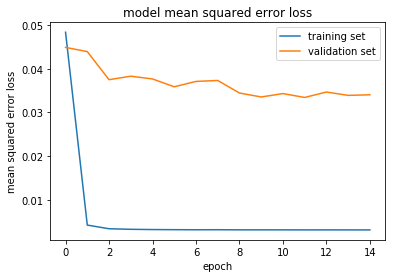

In [30]:
# plot the training and validation loss for each epoch
plt.figure
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()